## ASSIGNED exam3-3 nla - continuation



CLOSED: <span class="timestamp-wrapper"><span class="timestamp">[2018-12-10 Mon 11:46]</span></span>

:LABEL:    exam3-3
:POINTS:   3
:TYPE:     exam-3
:RUBRIC:   default
:RUBRIC\_CATEGORIES: technical, presentation
:RUBRIC\_WEIGHTS: 0.8, 0.2
:DUEDATE:  2018-12-10 23:59:59
:GRADER:   John Kitchin

**This is an exam. You must be present in the exam room to get credit for this problem unless you have prior permission from the instructor. You may not talk during the exam except to ask an instructor a question. By turning this in, you agree that this work is your own, and you did not get unauthorized help to complete it or provide unauthorized help to anyone else. You may not modify your exam answer after the due time without permission.**

A common problem in solving nonlinear problems is *how to make the initial guess*?

Let's consider finding the solution to the following nonlinear equations:

$2 + x + y - x^2 + 8 x y + y^3 = 0$

$1 + 2x - 3y + x^2 + xy - y e^x = 0$

The strategy we work on here is to reformulate these equations with a new variable $\lambda$

$2 + x + y + \lambda(- x^2 + 8 x y + y^3) = 0$

$1 + 2x - 3y + \lambda(x^2 + xy - y e^x) = 0$



#### Part 1 solve the linear problem



If $\lambda=1$ then we have the original nonlinear equations. If you set $\lambda=0$ though, you have a simple linear set of equations to solve. Find a solution to those equations for $\lambda=0$:



This solution represents the solution to the equations when $\lambda=0$. If we could derive a set of equations for $\frac{dx}{d\lambda}$ and $\frac{dy}{d\lambda}$, then we can treat this linear solution as an initial value, and integrate the ODEs from $\lambda=0$ to $\lambda=1$ to find the solution to the nonlinear equations. In what follows, we motivate how to derive those equations.



#### Part 2 formulate a system of ODEs to solve the nonlinear problem



Next, we consider the equations as

$f(x, y) = 2 + x + y + \lambda(- x^2 + 8 x y + y^3) = 0$

$g(x, y) = 1 + 2x - 3y + \lambda(x^2 + xy - y e^x) = 0$

from calculus, you can show that:

$\frac{\partial f}{\partial x}\frac{\partial x}{\partial \lambda}+\frac{\partial f}{\partial y}\frac{\partial y}{\partial \lambda}=-\frac{\partial f}{\partial \lambda}$

$\frac{\partial g}{\partial x}\frac{\partial x}{\partial \lambda}+\frac{\partial g}{\partial y}\frac{\partial y}{\partial \lambda}=-\frac{\partial g}{\partial \lambda}$

You can rewrite this in a linear algebra form as:

\begin{equation}
\left[\begin{array}{cc}
\frac{\partial f}{\partial x} \frac{\partial f}{\partial y} \\
\frac{\partial g}{\partial x} \frac{\partial g}{\partial y}
\end{array}\right]
\left[\begin{array}{c}
\frac{\partial x}{\partial \lambda}\\
\frac{\partial y}{\partial \lambda}
\end{array}\right]
=
\left[\begin{array}{c}
-\frac{\partial f}{\partial \lambda}\\
-\frac{\partial g}{\partial \lambda}
\end{array}\right]
\end{equation}

The matrix on the left is the Jacobian of $F = [f(x,y), g(x, y)]$. This means you can solve for:

$$\left[\begin{array}{c}
\frac{\partial x}{\partial \lambda}\\
\frac{\partial y}{\partial \lambda}
\end{array}\right]
=
\mathbf{J}^{-1}
\left[\begin{array}{c}
-\frac{\partial f}{\partial \lambda}\\
-\frac{\partial g}{\partial \lambda}
\end{array}\right]$$

This last equation defines a set of differential equations that can be integrated from $\lambda=0$ where we know what (x, y) are, to $\lambda=1$ which leads to a solution to the original set of nonlinear equations!

Use the last equation to define a function for a system of ODEs, and then integrate the system of ODES from $\lambda=0$ to $\lambda=1$ to find the solution to the nonlinear set of equations. The solution is the value of $x, y$ at $\lambda=1$.



#### Part 3 Verify the solution you found



Use a method of your choice to verify your solution from Part 2.



### solution



The solution to the linear part is done like this:



In [1]:
import numpy as np

x0 = np.linalg.solve([[1., 1.],
                      [2., -3.]],
                     [ -2, -1])
print(x0)

# Out[8]:
# output
[-1.4 -0.6]

We need the jacobian of the function with respect to x,y and with respect to lambda. Here is one way to do this.



In [1]:
import autograd.numpy as np
from autograd import jacobian

def F(X, L):
    x, y = X
    f = (2.0 + x + y) + L * (-x**2 + 8 * x * y + y**3)
    g = (1.0 + 2.0 * x - 3.0 * y) + L * (x**2 + x * y - y * np.exp(x))
    return np.array([f, g])

J = jacobian(F)
J(np.array([-1.4, -0.6]), 0.0)

dFdL = jacobian(F, 1)

# Out[9]:

Then, we can define the ODE as written in the problem.



# Out[13]:
# output
The solution is at x=-1.000, y=0.000
[ -1.27841341e-06  -1.15929141e-06]

# text/plain



# image/png

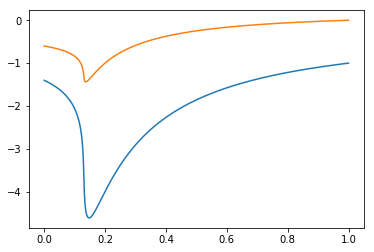

In [1]:
def ode(X, L):
    x, y = X
    j = J(np.array([x, y]), L)
    dXdL = np.linalg.inv(j) @ -dFdL(np.array([x, y]), L)
    return dXdL

from scipy.integrate import odeint

lambda_span = np.linspace(0, 1, 1000)

X = odeint(ode, x0, lambda_span)

xsol, ysol = X[-1]
print('The solution is at x={0:1.3f}, y={1:1.3f}'.format(xsol, ysol))
print(F([xsol, ysol], 1))

plt.plot(lambda_span, X)

The function is not super close to zero at the solution, primarily because of float tolerances in the ODE solver. You can see there is some stiff behavior near &lambda;=0.17, so a different solver might be more accurate.

There are several ways to verify your solution. One is to solve it another way.



In [1]:
from scipy.optimize import fsolve
fsolve(F, [-1, -0.01], args=(1,))

# Out[12]:
# text/plain
array([ -1.00000000e+00,   3.27745564e-18])